In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import relplot as rp

In [3]:
df = pd.read_csv('/data/ron/protein-conformal/data/sva_results_2024-05-31.csv')

In [5]:
df.head()

,p,x,y
0,0.000028,0.999852,False
1,0.000012,0.999819,False
2,0.000083,0.999842,False
3,0.000006,0.999827,False
4,0.000076,0.999826,False


In [5]:
# f: array of probabilities [f_i]
# y: array of binary labels [y_i]
f = df['p'].values
y = df['y'].values

calib_error = rp.smECE(f, y)   # compute calibration error (scalar)
print('calibration error:', rp.smECE(f, y))


calibration error: 0.00273631536422354


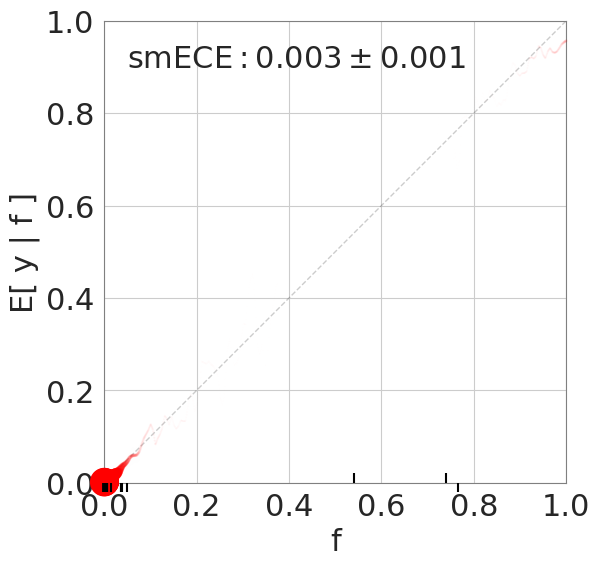

In [7]:
fig, ax = rp.rel_diagram(f, y) # plot

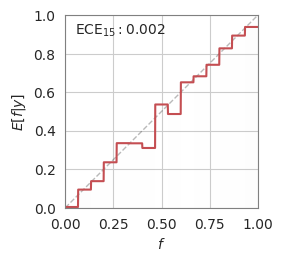

In [31]:
# plt.figure(figsize=(2.5, 2.5))
fig, ax = plt.subplots(figsize=(2.5, 2.5))
rp.rel_diagram_binned(f, y, ax=ax, fig=fig);
ax.set_xlabel(r'$f$', fontsize=10)
ax.set_ylabel(r'$E[f|y]$', fontsize=10)
# ax.set_xticks([0, 0.5, 1], fontsize=10)
# ax.set_yticks([0, 0.5, 1], fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
# ax.text(0.05, 0.95, f'ECE_15 : {ece:.3f}', transform=ax.transAxes, fontsize=8, alpha=0.7, color='gray', verticalalignment='top')
# Add this after the previous code
# This will add a white rectangle to cover the original ECE annotation
for child in ax.get_children():
    if isinstance(child, plt.Text) and 'ECE' in child.get_text():
        child.set_fontsize(10)  # Set to a smaller font size
        break
# ax.text(0.02, 0.98, ' ', transform=ax.transAxes, fontsize=12, 
#         verticalalignment='top', bbox=dict(facecolor='white', edgecolor='none', alpha=1))

# Add a smaller, less prominent ECE annotation
# ece_value = 0.002  # Replace with the actual ECE value if different
# ax.text(0.02, 0.98, f'ECE_15: {ece_value:.3f}', transform=ax.transAxes, fontsize=6, 
#         verticalalignment='top', color='gray', alpha=0.7)
# # save the plot as a pdf
plt.savefig('/data/ron/protein-conformal/figs/pfam_new/rel_diagram.pdf', format='pdf', bbox_inches='tight')

ValueError: Incorrect use of keyword argument 'fontsize'. Keyword arguments other than 'minor' modify the text labels and can only be used if 'labels' are passed as well.

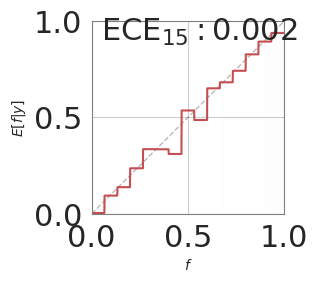

In [ ]:
# plt.figure(figsize=(2.5, 2.5))
fig, ax = plt.subplots(figsize=(2.5, 2.5))
rp.rel_diagram_binned(f, y, ax=ax, fig=fig);
ax.set_xlabel(r'$f$', fontsize=10)
ax.set_ylabel(r'$E[f|y]$', fontsize=10)
ax.set_xticks([0, 0.5, 1], fontsize=10)
ax.set_yticks([0, 0.5, 1], fontsize=10)
# save the plot as a pdf
plt.savefig('/data/ron/protein-conformal/figs/pfam_new/rel_diagram.pdf', format='pdf', bbox_inches='tight')

ValueError: Incorrect use of keyword argument 'fontsize'. Keyword arguments other than 'minor' modify the text labels and can only be used if 'labels' are passed as well.

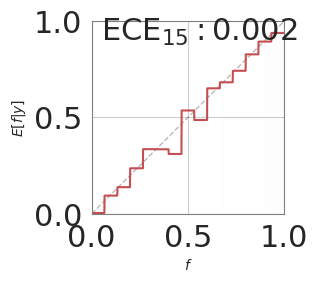

In [ ]:
# plt.figure(figsize=(2.5, 2.5))
fig, ax = plt.subplots(figsize=(2.5, 2.5))
rp.rel_diagram_binned(f, y, ax=ax, fig=fig);
ax.set_xlabel(r'$f$', fontsize=10)
ax.set_ylabel(r'$E[f|y]$', fontsize=10)
ax.set_xticks([0, 0.5, 1], fontsize=10)
ax.set_yticks([0, 0.5, 1], fontsize=10)
# save the plot as a pdf
plt.savefig('/data/ron/protein-conformal/figs/pfam_new/rel_diagram.pdf', format='pdf', bbox_inches='tight')

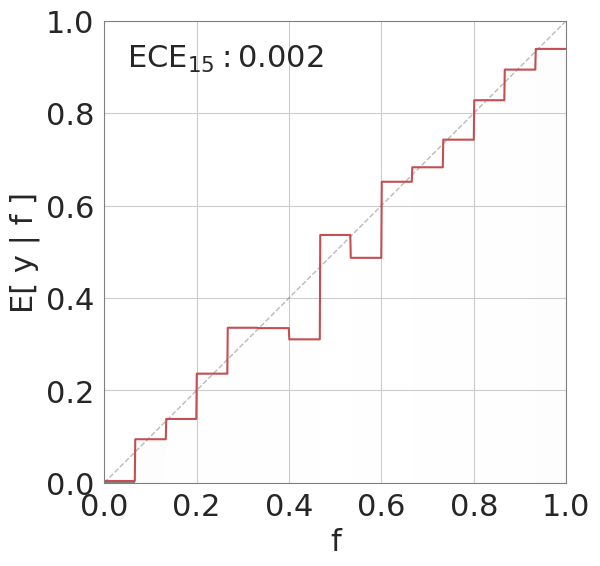

In [21]:
diagram = rp.prepare_rel_diagram_binned(f, y) # compute calibration data (dictionary)
# print('calibration error:', diagram['ce']) 
# plt.plot(diagram['mesh'],) # plot the calibration curve manually
fig, ax = rp.plot_rel_diagram_binned(mu=diagram['mu'], buckets=diagram['buckets'], alphas=diagram['alphas'], ece=diagram['ece'], t=diagram['t']) # plot the diagram in a new figure

In [9]:
import seaborn as sns

Text(0.5, 0.98, 'Plot Title')

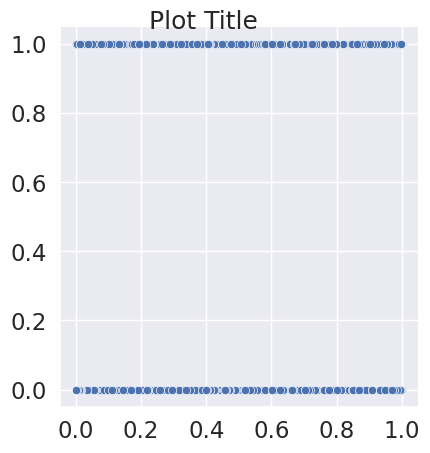

In [15]:
# Set the font scale globally using Seaborn
sns.set(font_scale=1.5)  # Adjust the value as needed

# Create the relplot
g = sns.relplot(x=f, y=y)  # Replace 'x' and 'y' with your actual data

# Adjust font sizes using Matplotlib rcParams
plt.rcParams.update({'axes.labelsize': 16,   # Axis labels
                     'xtick.labelsize': 12,  # X-tick labels
                     'ytick.labelsize': 12,  # Y-tick labels
                     'legend.fontsize': 14,  # Legend font size
                     'legend.title_fontsize': 16})  # Legend title font size

# Optionally, you can also adjust the title font size
g.fig.suptitle('Plot Title', fontsize=18)